In [38]:
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
from random import shuffle

class Event:
    def __init__(self, time, action, bm):
        self.time = time
        self.action = action
        self.bm = bm
    def __lt__(self, other):
        return (self.time, self.bm) < (other.time, other.bm)
    def __le__(self, other):
        return (self.time, self.bm) <= (other.time, other.bm)

class passagier:
    def __init__(self, Station):
        self.station = Station
        self.time = 0
    def __lt__(self, other):
        return (self.time, self.station) < (other.time, other.station)
    def __le__(self, other):
        return (self.time, self.station) <= (other.time, other.station)
        

def shuffle0(passengers):
    for i in range(len(passengers)):
        x = [j for j in range(len(passengers[i]))]
        shuffle(x)
        passengers[i] = [passengers[i][k] for k in x]

def calc_pic(grah, ListeColor, ListeSize):
    nx.draw_kamada_kawai(graph, with_labels = True, node_color = ListeColor, node_size = ListeSize)
    
def solve(eventq, passengers, bms, graph):
    #ListeNodes = list(graph.node)
    #ListeColor = ['blue']*len(ListeNodes)
    #save(passengers, bms)
    while eventq:
        # Abbruch Bedingung
        if ([len(passengers[i]) == 0 for i in range(len(passengers))] == [True]*len(passengers)) and ([bms[i]['n_passengers'] == 0 for i in range(len(bms))] == [True]*len(bms)):
            return print('Ende')
        event = hq.heappop(eventq)
        bm = bms[event.bm]
        current_node = bm['itinerary'][bm['stop'] % len(bm['itinerary'])]
        cn_number = bm['stop'] % len(bm['itinerary']) #Current Node Number
        
        next_node = bm['itinerary'][(bm['stop']+1) % len(bm['itinerary'])]
        current_node_time_idx = (bm['stop'] % len(bm['itinerary']))%len(bm['travel_times'])
        print('Fahrzeug {} ist am Knoten {}, der nächste Halt {}, die aktuelle Zeit:{}'.format(bm['name'],current_node, next_node, event.time))
        
        #ListeSize = [len(i)*10 for i in passengers]
        #ListeColor[current_node] = bm['color']
        #calc_pic(graph, ListeColor, ListeSize)
        #plt.savefig("img/{}.png".format(event.time))
        #plt.show()
        #ListeColor[current_node] = 'blue'
        
        if event.action == 'load':
            print('acton: {}'.format(event.action))
            free = bm['capacity'] - len(bm['n_passengers'])
            print('Fahrzeug {} load'.format(bm['name']))
            print('Fahrzeug {} hat {} Plätze frei'.format(bm['name'],free))
            while len(bm['n_passengers']) < bm['capacity']:
                waiting = [idx for idx, passenger in enumerate(passengers[current_node]) if passenger['station'] in bm['itinerary']]
                print('Warten: {}'.format(waiting))
                if not waiting:
                    break
                passenger = passengers[current_node].pop(waiting[0])
                #exittime = [idx for idx, station in e]
                print('Passagier:', passenger)
                exit_node = passenger['station']
                print(current_node)
                bm['n_passengers'] += [passenger]
                hq.heappush(eventq, Event(event.time + passenger['exit_time'],'exit', event.bm))
                #bessere 'exit_time' berechung muss her
                #print('time:', event.time+passenger['exit_time'])
            hq.heappush(eventq, Event(event.time + bm['travel_times'][current_node_time_idx], 'load', event.bm))
            bm['stop'] += 1
        #ListeColor[current_node] = 'blue'
        # Generate events for exiting passengers
        elif event.action == 'exit':
            print('acton: {}'.format(event.action))
            print('Fahrzeug {}, Passagier {} steit aus, time {}'.format(bm['name'], bm['n_passengers'],event.time))
            bm['n_passengers'] -= 1
            print('Es sind {} Passagiere in der Bahn'.format(bm['n_passengers']))
        else:
            raise Exception('Unknown event action')

IndentationError: expected an indented block (<ipython-input-38-915f25e0b041>, line 22)

Current node Number: 0
Fahrzeug 0 ist am Knoten 4, der nächste Halt 3, die aktuelle Zeit:0
acton: load
Fahrzeug 0 load
Fahrzeug 0 hat 30 Plätze frei
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Passagier: {'station': 0, 'exit_time': 15}
4
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Passagier: {'station': 1, 'exit_time': 10}
4
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Passagier: {'station': 0, 'exit_time': 15}
4
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Passagier: {'station': 0, 'exit_time': 15}
4
Warten: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 

TypeError: unsupported operand type(s) for -=: 'list' and 'int'

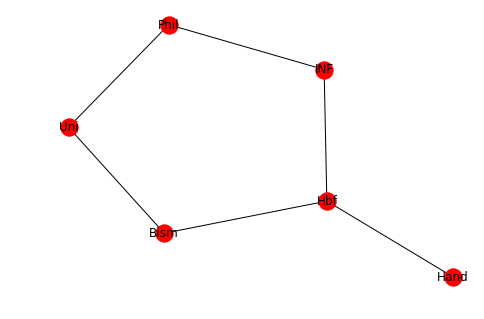

In [37]:
graph = nx.Graph()

graph.add_node('Hbf')
graph.add_node('INF')
graph.add_node('Phil')
graph.add_node('Uni')
graph.add_node('Bism')
graph.add_node('Hand')
#graph.add_node('Rohr')
#graph.add_node('Zieg')

ListeNodes = list(graph.node)

#Rundfahrt    
graph.add_edge(ListeNodes[0],ListeNodes[1])
graph.add_edge(ListeNodes[1],ListeNodes[0])
graph.add_edge(ListeNodes[1],ListeNodes[2])
graph.add_edge(ListeNodes[2],ListeNodes[1])
graph.add_edge(ListeNodes[2],ListeNodes[3])
graph.add_edge(ListeNodes[3],ListeNodes[2])
graph.add_edge(ListeNodes[3],ListeNodes[4])
graph.add_edge(ListeNodes[4],ListeNodes[3])
graph.add_edge(ListeNodes[4],ListeNodes[0])
graph.add_edge(ListeNodes[0],ListeNodes[4])

#Zubringer
graph.add_edge(ListeNodes[0],ListeNodes[5])
#graph.add_edge(ListeNodes[6],ListeNodes[0])
#graph.add_edge(ListeNodes[1],ListeNodes[5])
#graph.add_edge(ListeNodes[5],ListeNodes[1])
#graph.add_edge(ListeNodes[3],ListeNodes[7])
#graph.add_edge(ListeNodes[7],ListeNodes[3])

nx.draw_kamada_kawai(graph, with_labels = True)

passengers = [#
    [{'station': 1, 'exit_time': 10}]*20 + [{'station': 2, 'exit_time': 20}]*20+ [{'station': 3, 'exit_time': 30}]*20, #Hbf
    [{'station': 2, 'exit_time': 20}]*20 + [{'station': 3, 'exit_time': 10}]*20, # INF
    [{'station': 3, 'exit_time': 10}]*20 + [{'station': 4, 'exit_time': 20}]*20, # Phil
    [{'station': 4, 'exit_time': 30}]*20 + [{'station': 0, 'exit_time': 15}]*20, # Uni
    [{'station': 0, 'exit_time': 15}]*20 + [{'station': 1, 'exit_time': 10}]*20 # Bism
              ]#
bms = [{'color': '#fff000', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [4, 3, 2, 1, 0], 'name': 0, 'travel_times': [12, 12, 12, 12, 12]},
    {'color': '#ff00f0', 'n_passengers': [], 'capacity': 30, 'stop': 0, 'itinerary': [0, 1, 2, 3, 4], 'name': 1, 'travel_times': [12, 12, 12, 12, 12]}
       ]#

 
# shuffle passengers
shuffle0(passengers)
#print(passengers[4])

event0 = Event(0,'load',0)
event1 = Event(0,'load',1)
eventq = []
hq.heappush(eventq, event0)
hq.heappush(eventq, event1)

solve(eventq, passengers, bms, graph)